In [1]:
import scripts.vgg_19_relu_train as scrTrain
exp_name: str = 'trained-exp-vgg19-relu.model'
test_dict = scrTrain.load_training_data('./CSV/test/processed_test.csv')

label_names: list[str] = ['angry', 'disgust', 'happy', 'surprise']

2023-05-02 18:19:25.713012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 18:19:25.933845: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-02 18:19:25.933890: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-02 18:19:28.206878: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
from tensorflow.keras.models import load_model

model = load_model('./output/' + exp_name)

2023-05-02 18:19:59.307664: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-02 18:19:59.307860: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-02 18:19:59.307983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (penguin): /proc/driver/nvidia/version does not exist
2023-05-02 18:19:59.309866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 18:19:59.731119: W tensorflow/tsl/framework/cpu_allocator_impl.cc

In [3]:
from sklearn.preprocessing import LabelEncoder

le: LabelEncoder = LabelEncoder()
test_dict['label'] = le.fit_transform(test_dict['label'])

In [4]:
from tensorflow.keras.utils import to_categorical
test_data = test_dict['data'].values.reshape(-1, 48, 48, 1)
test_label = to_categorical(test_dict['label'], num_classes=4)
testLoss, testAcc = model.evaluate(test_data, test_label)

print('Test accuracy:', testAcc)

153/153 [==============================] - 70s 458ms/step - loss: 0.4667 - accuracy: 0.8315
Test accuracy: 0.8314606547355652


In [5]:
print("test_md shape:", test_dict['data'].shape)
print("label_test shape:", test_dict['label'].shape)

test_md shape: (4895, 2304)
label_test shape: (4895,)


In [6]:
from sklearn.metrics import classification_report
import numpy as np
test_data = test_dict['data'].values.reshape(-1, 48, 48, 1)  # Reshape test data to match the input shape of the model

# Check if the labels are one-hot encoded or not
if test_dict['label'].ndim > 1:
    test_labels = np.argmax(test_dict['label'], axis=1)
else:
    test_labels = test_dict['label']

X_pred = model.predict(test_data)

y_pred_labels = np.argmax(X_pred, axis=1)

print(classification_report(test_labels, y_pred_labels, target_names=label_names))

153/153 [==============================] - 81s 529ms/step
              precision    recall  f1-score   support

       angry       0.68      0.72      0.70       958
     disgust       0.91      0.88      0.90      1332
       happy       0.85      0.87      0.86      1774
    surprise       0.84      0.79      0.81       831

    accuracy                           0.83      4895
   macro avg       0.82      0.82      0.82      4895
weighted avg       0.83      0.83      0.83      4895



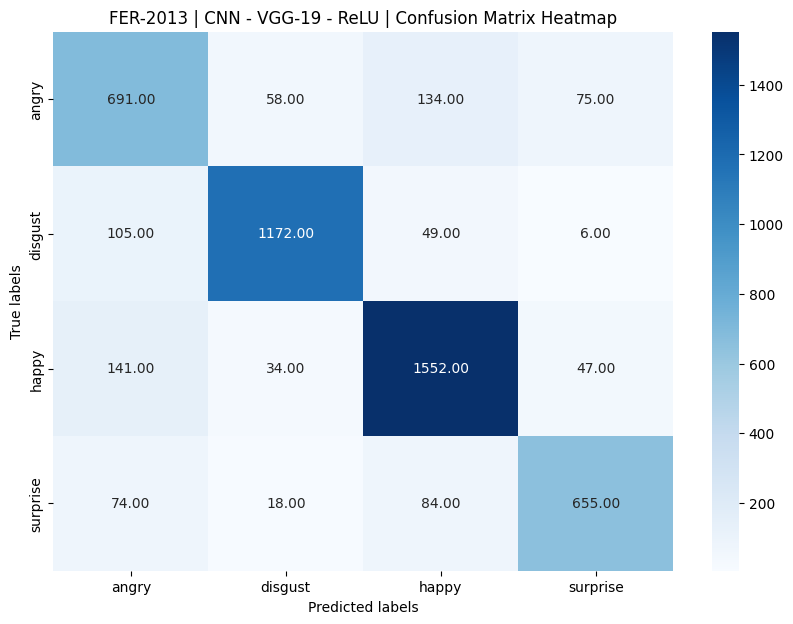

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import textwrap

labelLength = 8
wrappedLabelNames = [textwrap.fill(label.replace('/', ' '), labelLength, break_long_words=False, replace_whitespace=False, drop_whitespace=False) for label in label_names]

# Heart Failure Prediction: SVM and ANN
cm = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=wrappedLabelNames, yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('FER-2013 | CNN - VGG-19 - ReLU | Confusion Matrix Heatmap')
plt.show()

# make more test disgust images